# (Не)поврзаноста на бројот на самоубиства со „среќните“ земји

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Вчитување на податочните множества

> Податочно множество: Извештај за среќата во светот во 2015 година

In [2]:
happiness_data=pd.read_csv('2015.csv')

> Податочно множество: Извештај за самоубиства во светот во 2015 година

In [3]:
suicides_data=pd.read_csv('who_suicide_statistics.csv')

###  Преглед на податоците

In [4]:
happiness_data.head() # првите 5 реда од податоците

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
suicides_data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


#### Број на редови и колони во податочните множества за среќа и самоубиство, соодветно

In [6]:
print('Number of rows: ',happiness_data.shape[0],'\nNumber of columns: ',happiness_data.shape[1])

Number of rows:  158 
Number of columns:  12


In [7]:
print('Number of rows: ',suicides_data.shape[0],'\nNumber of columns: ',suicides_data.shape[1])

Number of rows:  43776 
Number of columns:  6


#### Преглед на содржината на колоните во двете множества

In [8]:
suicides_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [9]:
happiness_data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

#### Преименување на колоната по која ќе се спојуваат двете множества

In [10]:
happiness_data = happiness_data.rename(columns={'Country': 'country'})

###  Спојување на податочните множества според колоната "country"


In [11]:
merged_data=pd.merge(happiness_data, suicides_data, on='country')

### Анализа на податоците во резултантното множество

In [12]:
merged_data.head()

,country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,sex,age,suicides_no,population
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,15-24 years,NaN,474000.0
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,25-34 years,NaN,485600.0
2,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,35-54 years,NaN,811100.0
3,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,5-14 years,NaN,448000.0
4,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,55-74 years,NaN,626400.0


In [13]:
merged_data.columns

Index(['country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year', 'sex', 'age', 'suicides_no',
       'population'],
      dtype='object')

In [14]:
merged_data.shape[0] # број на редови

31032

In [15]:
merged_data.head()

,country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,sex,age,suicides_no,population
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,15-24 years,NaN,474000.0
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,25-34 years,NaN,485600.0
2,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,35-54 years,NaN,811100.0
3,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,5-14 years,NaN,448000.0
4,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,55-74 years,NaN,626400.0


In [16]:
merged_data.head()

,country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,sex,age,suicides_no,population
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,15-24 years,NaN,474000.0
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,25-34 years,NaN,485600.0
2,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,35-54 years,NaN,811100.0
3,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,5-14 years,NaN,448000.0
4,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1979,female,55-74 years,NaN,626400.0


## 2. Прочистување на податоците

Во резултантното множество има податоци и од други години. Тоа се податоци кои доаѓаат од множеството за самоубиства во светот. Податочното множество за среќата во светот не содржи податоци за други години, освен за 2015 година. Поради тоа, се селектираат податоците кои се само од 2015 година.

In [17]:
data_2015=merged_data[merged_data['year']==2015]

In [18]:
data_2015.head()

,country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,sex,age,suicides_no,population
432,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,15-24 years,20.0,462559.0
433,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,25-34 years,24.0,577973.0
434,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,35-54 years,111.0,1227126.0
435,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,5-14 years,2.0,390910.0
436,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,55-74 years,82.0,922222.0


Податоците се експортираат за полесен преглед користејќи програма за табеларен преглед на податоци.

In [19]:
data_2015.to_csv('data_2015.csv')

In [20]:
data_2015.columns

Index(['country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year', 'sex', 'age', 'suicides_no',
       'population'],
      dtype='object')

Анализирајќи ги податоците, се донесе заклучок дека колоните "Region" и "Standard error" не се потребни за ова истражување и поради тоа се отстрануваат.

In [21]:
data_2015.drop(columns=['Region','Standard Error',],inplace=True)

c:\users\sara\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
data_2015.columns

Index(['country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year', 'sex', 'age', 'suicides_no', 'population'],
      dtype='object')

In [23]:
data_2015.shape[0]

672

In [24]:
# се отстрануваат сите редови кои содржат null вредности 
data_2015 = data_2015.dropna() 
data_2015.shape[0]

636

In [25]:
data_2015['Happiness Rank'].min()

1

## 3. Испитување на податоците

 - **Број на самоубиства во светот според години и пол**: од графикот долу се гледа дека бројот на самоубиства е поголем кај машкиот пол во скоро сите држави во светот.

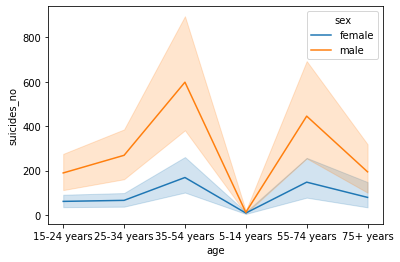

In [26]:
worldwide=sns.lineplot(x='age',y='suicides_no',hue='sex',data=data_2015)

In [27]:
suicides_by_age=data_2015[data_2015['Happiness Rank']==data_2015['Happiness Rank'].min()][['country','sex','suicides_no','age']].groupby('age')['suicides_no'].sum()

In [28]:
suicides_by_gender=data_2015[data_2015['Happiness Rank']==data_2015['Happiness Rank'].min()][['country','sex','suicides_no','age']].groupby('sex')['suicides_no'].sum()

Подетален преглед на распределбата на бројот на самоубиства по возраст и пол

In [29]:
suicides_by_age

age
15-24 years     82.0
25-34 years    104.0
35-54 years    353.0
5-14 years       4.0
55-74 years    346.0
75+ years      184.0
Name: suicides_no, dtype: float64

In [30]:
suicides_by_gender

sex
female    280.0
male      793.0
Name: suicides_no, dtype: float64

„Најсреќна“ земја во светот е онаа земја која има најмала вредност за 'Happiness Rank', односно земјата која има највисок ранг на среќа. Во овој случај тоа е Швајцарија.

In [31]:
happiest_country=data_2015[data_2015['Happiness Rank']==data_2015['Happiness Rank'].min()][['country','sex','suicides_no','age','population']]
happiest_country

,country,sex,suicides_no,age,population
432,Switzerland,female,20.0,15-24 years,462559.0
433,Switzerland,female,24.0,25-34 years,577973.0
434,Switzerland,female,111.0,35-54 years,1227126.0
435,Switzerland,female,2.0,5-14 years,390910.0
436,Switzerland,female,82.0,55-74 years,922222.0
437,Switzerland,female,41.0,75+ years,414205.0
438,Switzerland,male,62.0,15-24 years,482708.0
439,Switzerland,male,80.0,25-34 years,586880.0
440,Switzerland,male,242.0,35-54 years,1248988.0
441,Switzerland,male,2.0,5-14 years,411880.0


In [32]:
import matplotlib.pyplot as plt

In [33]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

<Figure size 1200x800 with 0 Axes>

In [34]:
plt.rcParams['figure.figsize'] = [10, 5]

Се додава колона за процент на самоубиства со цел споредбите кои се прават да бидат валидни. Ако се земе само бројот на самоубиства, а не и вкупната популација на која се однесува тој број, тогаш распределбата на бројот на самоубиства во една земја по возраст и пол нема да е релевантна.

In [35]:
happiest_country['suicides percentage'] = (happiest_country['suicides_no'] / happiest_country['population'])*100

 - На графикот подолу е прикажана распределбата на самоубиства по пол и возраст во најсреќната земја - Швајцарија.

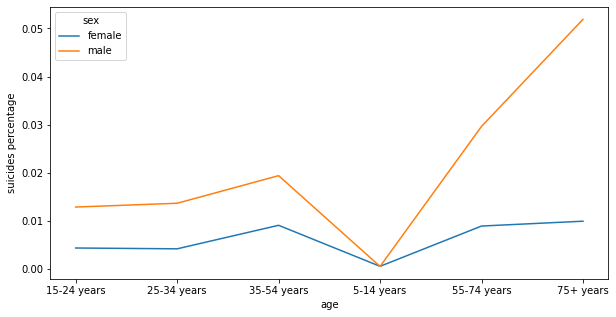

In [36]:
ax=sns.lineplot(x='age',y='suicides percentage',hue='sex',data=happiest_country)

Со иста постапка се анализира и бројот на самоубиства во најнесреќната земја - Египет.

In [37]:
data_2015[data_2015['Happiness Rank']==data_2015['Happiness Rank'].max()]['country'].unique()[0]

'Egypt'

In [38]:
saddest_country=data_2015[data_2015['Happiness Rank']==data_2015['Happiness Rank'].max()][['country','sex','suicides_no','age','population']]

In [39]:
saddest_country

,country,sex,suicides_no,age,population
31020,Egypt,female,7.0,15-24 years,8654601.0
31021,Egypt,female,1.0,25-34 years,7626113.0
31022,Egypt,female,3.0,35-54 years,9212517.0
31023,Egypt,female,1.0,5-14 years,8567070.0
31024,Egypt,female,1.0,55-74 years,4102872.0
31025,Egypt,female,0.0,75+ years,568921.0
31026,Egypt,male,8.0,15-24 years,9091531.0
31027,Egypt,male,6.0,25-34 years,7877832.0
31028,Egypt,male,14.0,35-54 years,9383632.0
31029,Egypt,male,2.0,5-14 years,9170196.0


<AxesSubplot:xlabel='age', ylabel='suicides_no'>

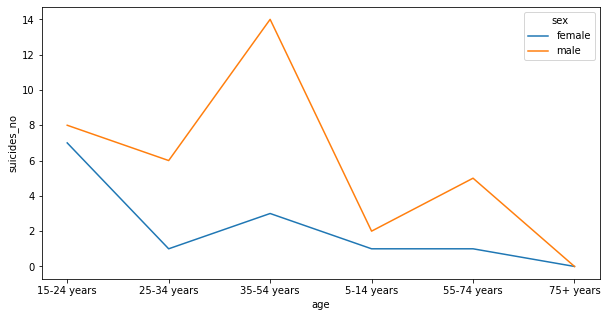

In [40]:
sns.lineplot(x='age',y='suicides_no',hue='sex',data=saddest_country)

In [41]:
saddest_country['suicides percentage'] = (saddest_country['suicides_no'] / saddest_country['population'])*100

 - На графикот подолу е прикажана распределбата на самоубиства по пол и возраст во најнесреќната земја - Египет.

<AxesSubplot:xlabel='age', ylabel='suicides percentage'>

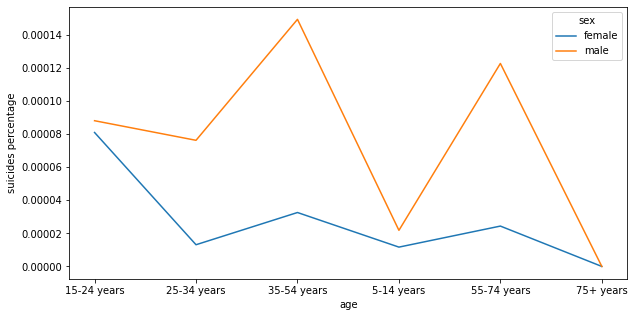

In [42]:
sns.lineplot(x='age',y='suicides percentage',hue='sex',data=saddest_country)

Со следните два исказа се наоѓаат државите кои имаат најголем и најмал број на самоубиства соодветно, не земајќи ја во предвид вкупната популација.

In [43]:
suicides_by_country=data_2015.groupby(['country'])['suicides_no'].agg(suicides='sum').query('suicides == suicides.max()')
print(suicides_by_country)

         suicides
country          
Japan     23092.0


In [44]:
suicides_by_country_min=data_2015.groupby(['country'])['suicides_no'].agg(suicides='sum').query('suicides == suicides.min()')
print(suicides_by_country_min)

         suicides
country          
Malta        34.0


In [45]:
suicides_country=data_2015.groupby(['country'])['suicides_no'].agg(suicides='sum')


In [46]:
population_country=data_2015.groupby(['country'])['population'].agg(population='sum')


In [47]:
suicides_country

,suicides
country,
Argentina,3073.0
Armenia,74.0
Australia,3027.0
Austria,1251.0
Belgium,1867.0
Brazil,11163.0
Chile,1838.0
Colombia,2332.0
Croatia,739.0


In [48]:
population_country

,population
country,
Argentina,39699624.0
Armenia,2795335.0
Australia,22240785.0
Austria,8219386.0
Belgium,10624356.0
Brazil,191087085.0
Chile,16565725.0
Colombia,44490427.0
Croatia,4001669.0


Откако се генерираат табелите држава - самоубиства и држава - популација, се спојуваат според државата и се добива резултантата табела подолу. Потоа се додава и нова колона процентот на самоубиства (самоубиства / популација).

In [49]:
population_suicides=pd.merge(population_country, suicides_country, on='country')
print(population_suicides)

                 population  suicides
country                              
Argentina        39699624.0    3073.0
Armenia           2795335.0      74.0
Australia        22240785.0    3027.0
Austria           8219386.0    1251.0
Belgium          10624356.0    1867.0
Brazil          191087085.0   11163.0
Chile            16565725.0    1838.0
Colombia         44490427.0    2332.0
Croatia           4001669.0     739.0
Cyprus             796037.0      40.0
Czech Republic    9989325.0    1387.0
Denmark           5383060.0     564.0
Ecuador          14534024.0    1073.0
Egypt            78885166.0      48.0
Estonia           1243450.0     195.0
Finland           5181797.0     731.0
Georgia           3458400.0     192.0
Germany          78136683.0   10088.0
Greece           10331286.0     529.0
Guatemala        14258397.0     494.0
Hungary           9389519.0    1868.0
Iceland            308554.0      40.0
Israel            7516180.0     342.0
Italy            58117697.0    3988.0
Japan       

In [50]:
population_suicides['suicides_percentage'] = (population_suicides['suicides'] / population_suicides['population'])*100

In [51]:
population_suicides

,population,suicides,suicides_percentage
country,,,
Argentina,39699624.0,3073.0,0.007741
Armenia,2795335.0,74.0,0.002647
Australia,22240785.0,3027.0,0.013610
Austria,8219386.0,1251.0,0.015220
Belgium,10624356.0,1867.0,0.017573
Brazil,191087085.0,11163.0,0.005842
Chile,16565725.0,1838.0,0.011095
Colombia,44490427.0,2332.0,0.005242
Croatia,4001669.0,739.0,0.018467


Претходно, беа пронајдени земјите со најголем и најмал број на самоубиства не земајќи го во предвид вкупното население. Сега се наоѓаат земјите кои имаат процентуално најмал и процентуално најголем број на самоубиства. Тоа се Египет и Литванија соодветно.

In [52]:
suicides_percentage_by_country_min=population_suicides.query('suicides_percentage == suicides_percentage.min()')
print(suicides_percentage_by_country_min)

         population  suicides  suicides_percentage
country                                           
Egypt    78885166.0      48.0             0.000061


In [53]:
suicides_percentage_by_country_max=population_suicides.query('suicides_percentage == suicides_percentage.max()')
print(suicides_percentage_by_country_max)

           population  suicides  suicides_percentage
country                                             
Lithuania   2753926.0     896.0             0.032535


In [54]:
happinessmetrics_suicides=data_2015.groupby(['country','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Generosity','Dystopia Residual','Trust (Government Corruption)','Freedom']).sum()[['population','suicides_no']]
happinessmetrics_suicides['suicides_percentage'] = (happinessmetrics_suicides['suicides_no'] / happinessmetrics_suicides['population'])*100
happinessmetrics_suicides

,,,,,,,,population,suicides_no,suicides_percentage
country,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity,Dystopia Residual,Trust (Government Corruption),Freedom,,,
Argentina,1.05351,1.24823,0.78723,0.11451,2.83600,0.08484,0.44974,39699624.0,3073.0,0.007741
Armenia,0.76821,0.77711,0.72990,0.07855,1.75873,0.03900,0.19847,2795335.0,74.0,0.002647
Australia,1.33358,1.30923,0.93156,0.43562,2.26646,0.35637,0.65124,22240785.0,3027.0,0.013610
Austria,1.33723,1.29704,0.89042,0.33088,2.53320,0.18676,0.62433,8219386.0,1251.0,0.015220
Belgium,1.30782,1.28566,0.89667,0.22250,2.41484,0.22540,0.58450,10624356.0,1867.0,0.017573
Brazil,0.98124,1.23287,0.69702,0.14574,3.26001,0.17521,0.49049,191087085.0,11163.0,0.005842
Chile,1.10715,1.12447,0.85857,0.33363,2.67585,0.12869,0.44132,16565725.0,1838.0,0.011095
Colombia,0.91861,1.24018,0.69077,0.18401,2.85737,0.05120,0.53466,44490427.0,2332.0,0.005242
Croatia,1.08254,0.79624,0.78805,0.05444,2.75414,0.02430,0.25883,4001669.0,739.0,0.018467


Следно што е анализирано во ова истражување е процентот на самоубиства во државите, зависно од 6 фактори кои се земени при истражувањето за среќата во светот: економија, семејство, здравство, дарежливост, доверба во власта и слобода.

 - Процент на самоубиства во државите според економијата.

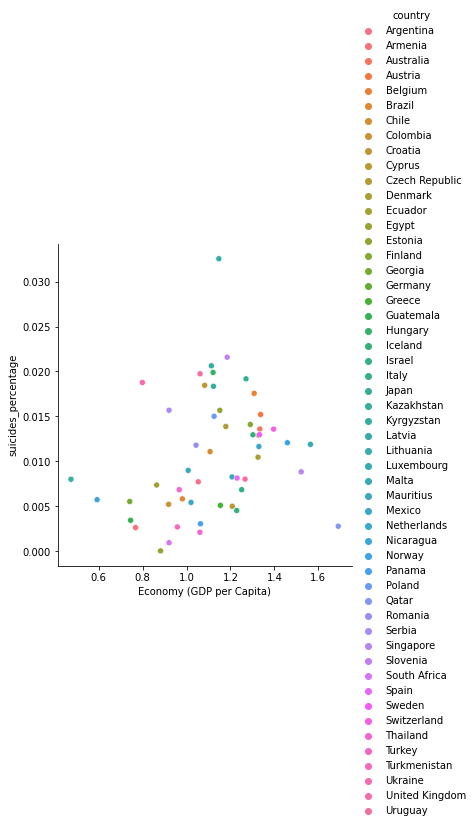

In [55]:
sns.relplot(x='Economy (GDP per Capita)',y='suicides_percentage',hue='country',data=happinessmetrics_suicides)

 - Процент на самоубиства во државите според фактор семејство.

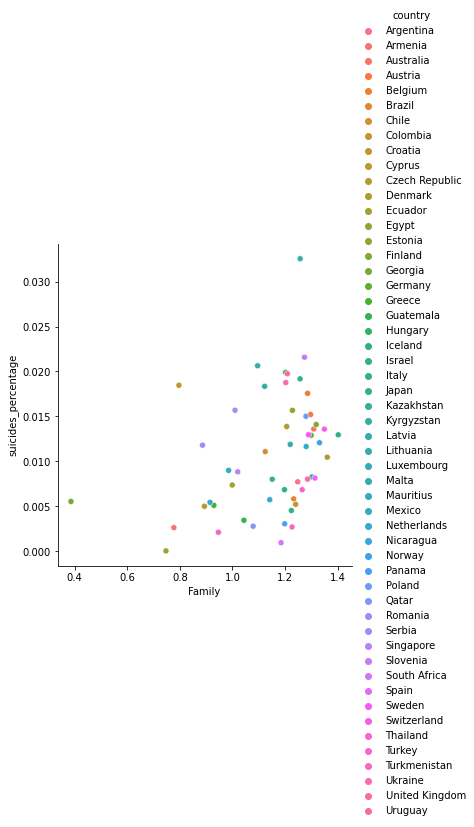

In [56]:
sns.relplot(x='Family',y='suicides_percentage',hue='country',data=happinessmetrics_suicides)

 - Процент на самоубиства во државите според здравство.

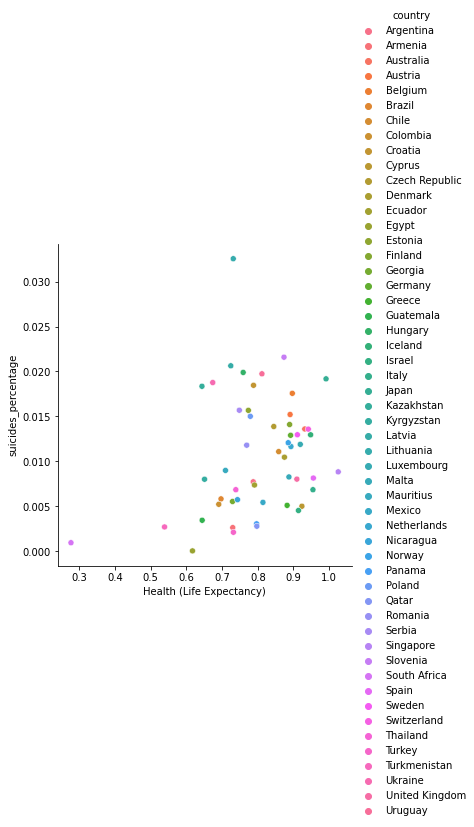

In [57]:
sns.relplot(x='Health (Life Expectancy)',y='suicides_percentage',hue='country',data=happinessmetrics_suicides)


 - Процент на самоубиства во државите според дарежливост.

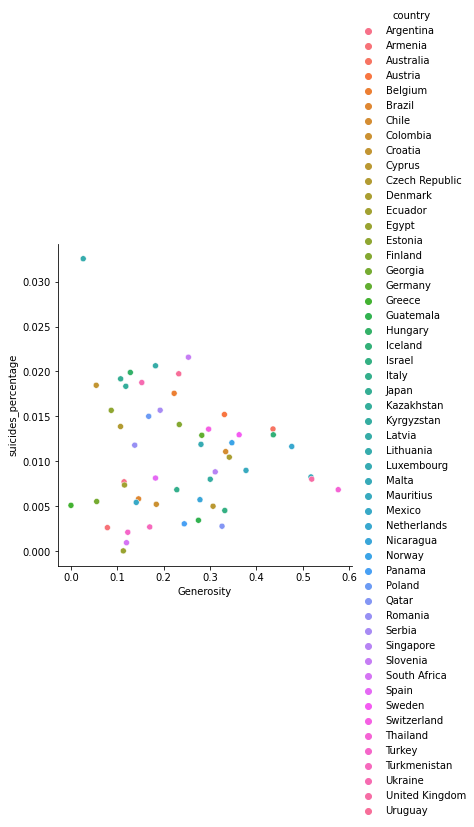

In [58]:
sns.relplot(x='Generosity',y='suicides_percentage',hue='country',data=happinessmetrics_suicides)


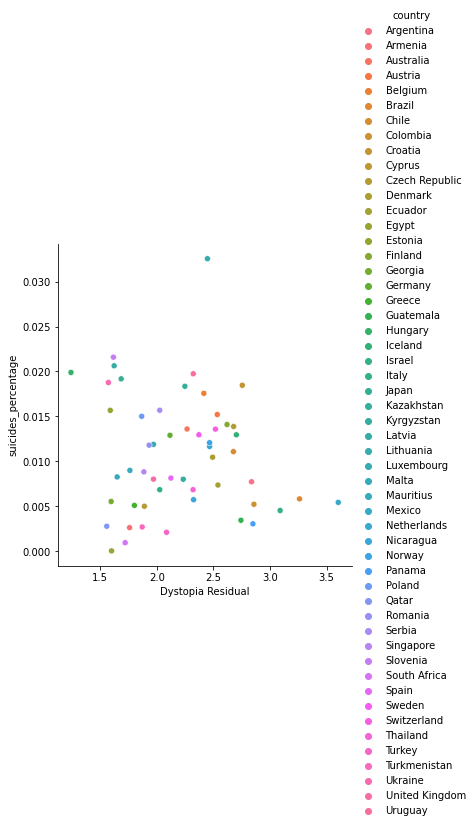

In [59]:
sns.relplot(x='Dystopia Residual',y='suicides_percentage',hue='country',data=happinessmetrics_suicides)

 - Процент на самоубиства во државите според довербата во власта.

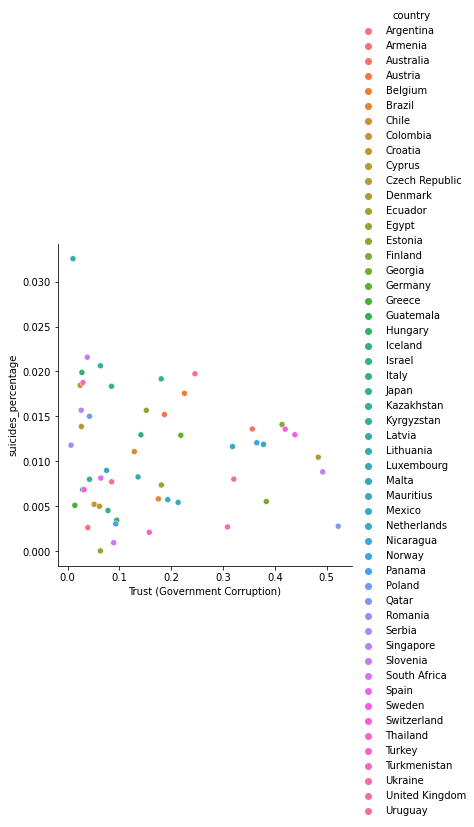

In [60]:
sns.relplot(x='Trust (Government Corruption)',y='suicides_percentage',hue='country',data=happinessmetrics_suicides)

 - Процент на самоубиства во државите според слободата.

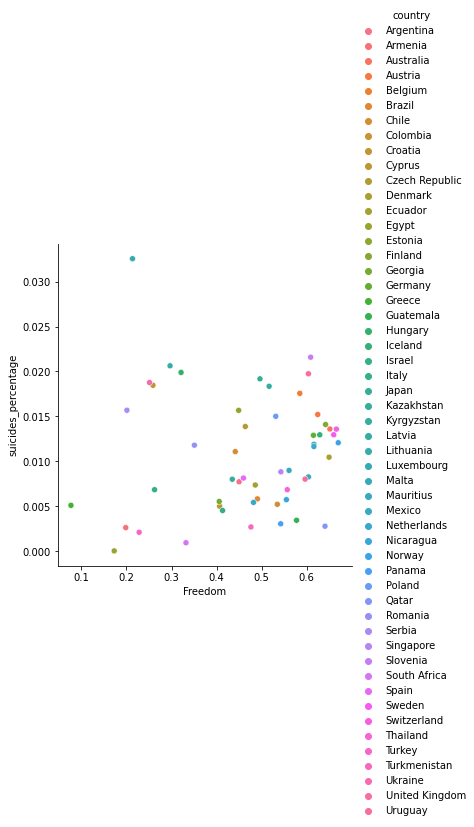

In [61]:
sns.relplot(x='Freedom',y='suicides_percentage',hue='country',data=happinessmetrics_suicides)

**Причината за самоубиствата не може да се идентифицира лесно. Секоја земја има различни резултати за метриките што носи и многу различни причини и комбинации кои водат до самоубиства.**

Следната табела и следниот график даваат детален преглед на државите и процентот на самоубиства во секоја држава според полот.

In [62]:
gender_country_suicides=data_2015.groupby(['country','sex']).sum()[['population','suicides_no']]
gender_country_suicides['suicides_percentage'] = (gender_country_suicides['suicides_no'] / gender_country_suicides['population'])*100
gender_country_suicides

population  suicides_no  suicides_percentage
country        sex                                                 
Argentina      female  20346129.0        604.0             0.002969
               male    19353495.0       2469.0             0.012757
Armenia        female   1472585.0         19.0             0.001290
               male     1322750.0         55.0             0.004158
Australia      female  11201512.0        735.0             0.006562
...                           ...          ...                  ...
Ukraine        male    18552231.0       6148.0             0.033139
United Kingdom female  31072226.0       1178.0             0.003791
               male    30010716.0       3732.0             0.012436
Uruguay        female   1657298.0        131.0             0.007904
               male     1533497.0        499.0             0.032540

[106 rows x 3 columns]

<AxesSubplot:xlabel='country', ylabel='suicides_percentage'>

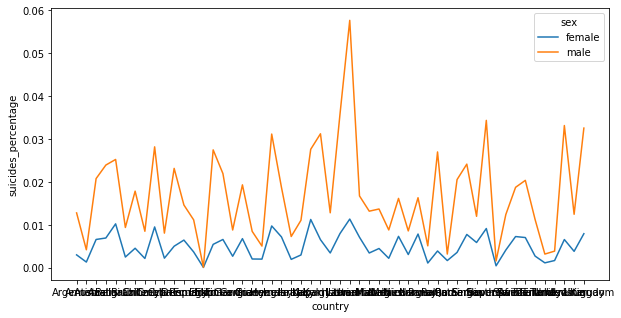

In [63]:
sns.lineplot(x='country',y='suicides_percentage',hue='sex',data=gender_country_suicides)

**Може да се заклучи дека машката популација има значително повисок степен на самоубиства од женската популација.**